# Notebook 3: Explicabilité et Interprétabilité des Modèles

**Auteurs:**  

Akram Farihi, Sami Abloui, Amalya Mourih 


**Objectifs de notebook:**

Dans ce notebook, nous réalisons l’exploration ce jeux des données. 
L’objectif est de comprendre la structure des données, identifier les variables pertinentes et observer les relations entre les attributs.


In [1]:
# Imports
from sys import path
import matplotlib.pyplot as plt

path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.explainability.exp_utils import calculate_probas
from src.explainability.exp_utils import create_shap_explainer
from src.explainability.exp_utils import calculate_shap_values
import mlflow
import shap
print("Les bibliothèques sont importées avec succès.")

c:\Users\amaly\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Les bibliothèques sont importées avec succès.


Nous chargeons maintenant les données prétraitées. 

In [2]:
# 1. Charger les quatre fichiers CSV
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

Afin d'analyser l'explicabilité du modèle de manière équilibrée, nous sélectionnons des échantillons représentatifs de chaque classe de qualité de sommeil (Poor, Fair, Good, Excellent) dans l'ensemble de test. Cette approche permet d'obtenir des visualisations SHAP cohérentes et comparables entre les différentes classes.

In [3]:
indices = []
idxs = []
for j in range(4):
    for i in range (y_test.shape[0]):
        if (y_test.iloc[i, 0] == j):
            if(len(idxs) < 10):
                idxs.append(i)
            else:
                break
    indices = idxs + indices

print(indices)

[5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57, 5, 11, 12, 14, 24, 25, 27, 36, 37, 57]


Poursuivons par le téléchargements des models enregistrées sur nos fichiers. 

In [4]:
# MODIFIER LE CHEMIN EN FONCTION D'OU SE TROUVE LE FICHIER

#model_path = "../mlruns/644848172247683146/models/m-b0d1297d4f33430bb02bcec4e365c73f/artifacts" 
model_path = "../mlruns/647375204292483572/models/m-d9460f983d6d4d82b720bcebe9f836f6/artifacts"

# Check available models
import glob
available_models = glob.glob("../mlruns/647375204292483572/models/*/artifacts/*.pkl")
print("Available models:")
for model in available_models:
    print(f" - {model}")

model = mlflow.sklearn.load_model(model_path)

print(f"\n Model loaded from: {model_path}")

Available models:
 - ../mlruns/647375204292483572/models\m-0c3128a29ca64befbd4e63ab7710e983\artifacts\model.pkl
 - ../mlruns/647375204292483572/models\m-7ddb7f4d12384e12bd5eef4205a2bb40\artifacts\model.pkl
 - ../mlruns/647375204292483572/models\m-d9460f983d6d4d82b720bcebe9f836f6\artifacts\model.pkl

 Model loaded from: ../mlruns/647375204292483572/models/m-d9460f983d6d4d82b720bcebe9f836f6/artifacts


In [5]:
predict_fn = lambda X: calculate_probas(model, X)[1]

# 1. Création de l'explainer
explainer_shap = create_shap_explainer(
    predict_fn=predict_fn, 
    data=X_train 
) 

# 2. Calcul des valeurs SHAP
shap_values = calculate_shap_values(explainer_shap, X_test.iloc[indices])

C:\Users\amaly\AppData\Local\Temp\ipykernel_8584\3397424894.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


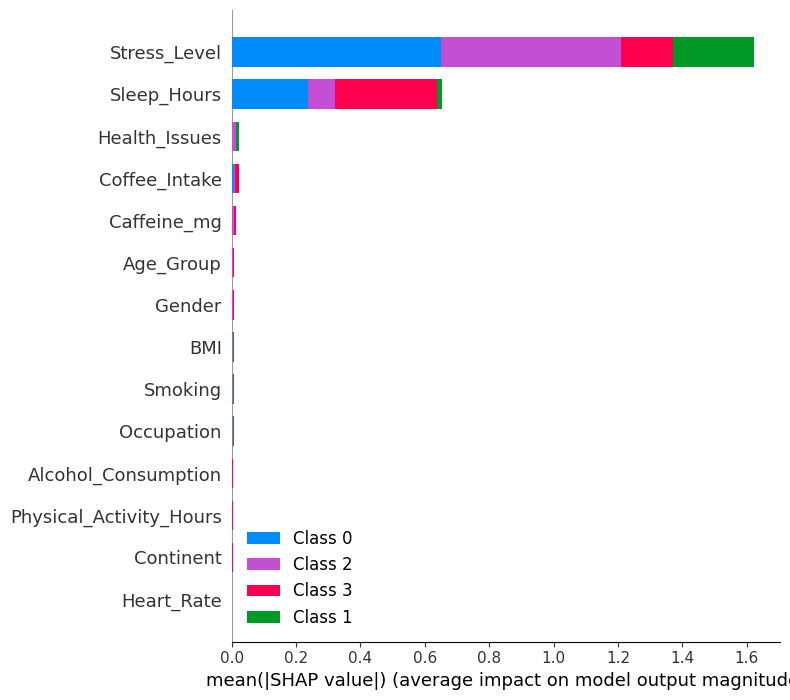

In [6]:
shap.summary_plot(
    shap_values, # On prend toutes les samples, toutes les features, pour la classe 2
    X_test.iloc[indices], 
    show=False # Pour éviter l'affichage dans certaines environnements
)

C:\Users\amaly\AppData\Local\Temp\ipykernel_8584\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


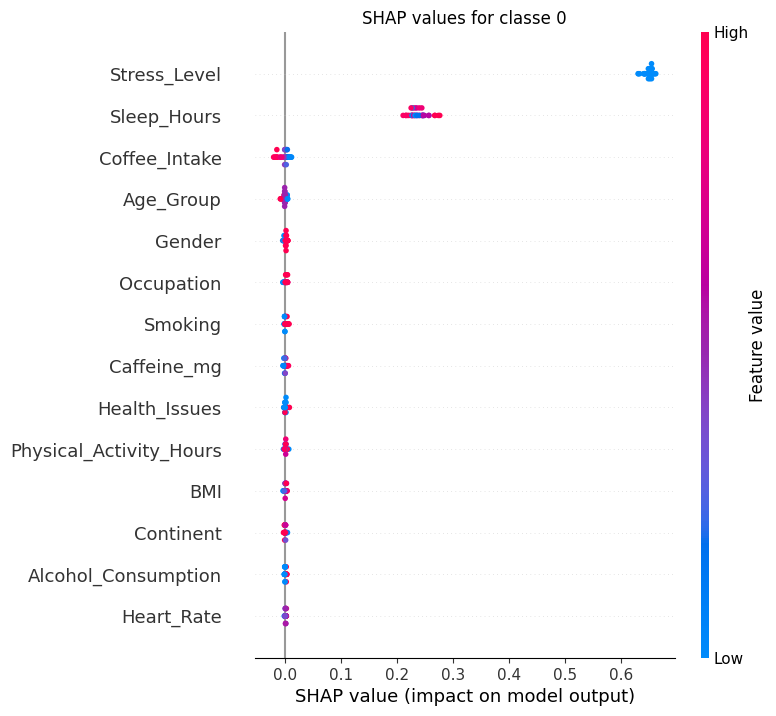

C:\Users\amaly\AppData\Local\Temp\ipykernel_8584\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


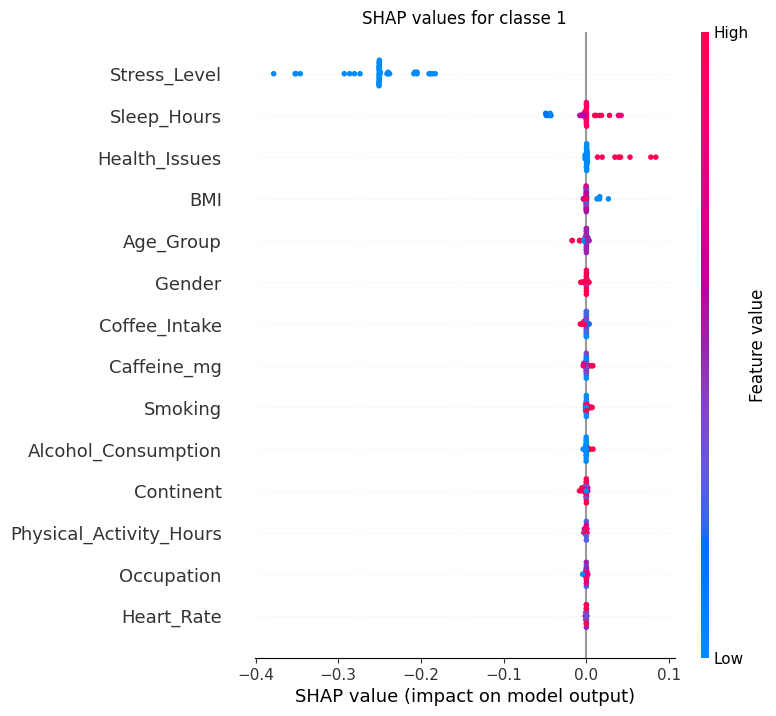

C:\Users\amaly\AppData\Local\Temp\ipykernel_8584\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


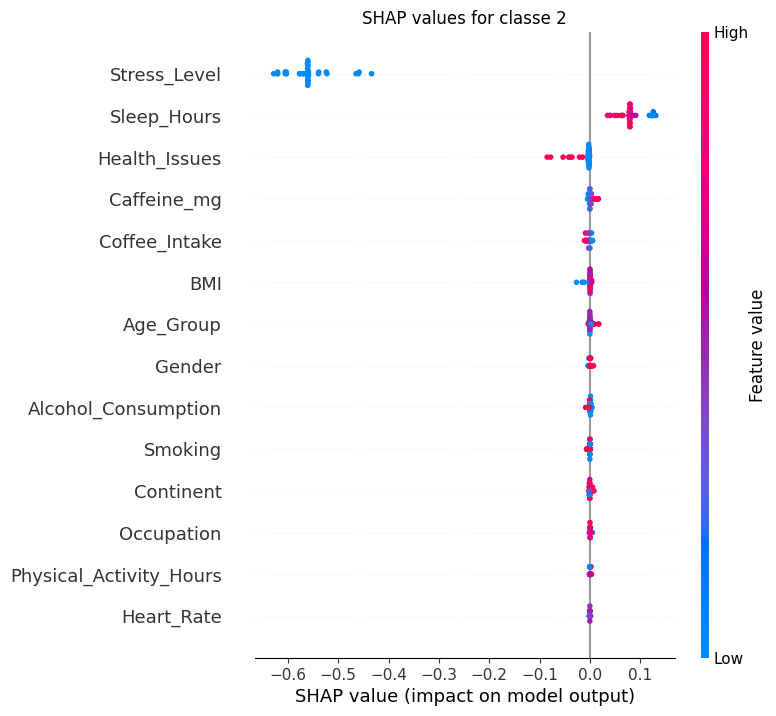

C:\Users\amaly\AppData\Local\Temp\ipykernel_8584\682314111.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


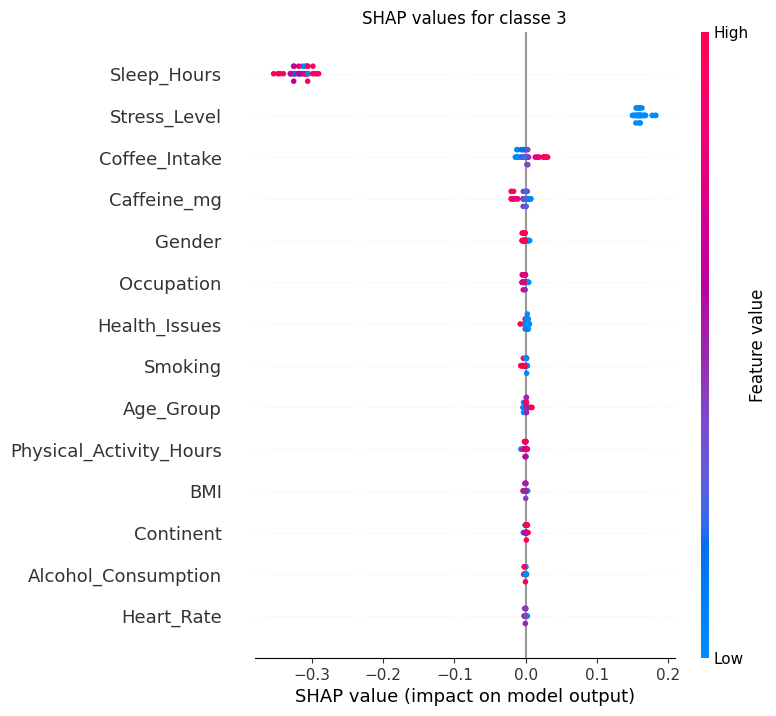

In [7]:

for i in range(4):
    # 1. Utilise shap.summary_plot sans l'argument 'title'
    shap.summary_plot(
        shap_values[:, :, i],
        X_test.iloc[indices],
        show=False # On empêche l'affichage immédiat
    )
    
    # 2. Ajoute le titre en utilisant Matplotlib
    plt.title(f"SHAP values for classe {i}")
    
    # 3. Affiche la figure
    plt.show()